In [2]:
import os
os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

import matplotlib.pyplot as plt
plt.matplotlib.rcParams.update({'font.size': 18, 'font.family': 'serif'})

import datetime
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torchviz import make_dot

from torch.utils.tensorboard import SummaryWriter

from utils import log_in_json, get_summary_df
from net import Net, NetCustom
from net import train_epoch, test_epoch, test_per_class

%load_ext tensorboard
%load_ext autoreload
%autoreload 2
%matplotlib inline
%tensorboard --logdir logs/tensorboard 

path_data = "./data"

## Pipeline

Using cuda
Model architecture:


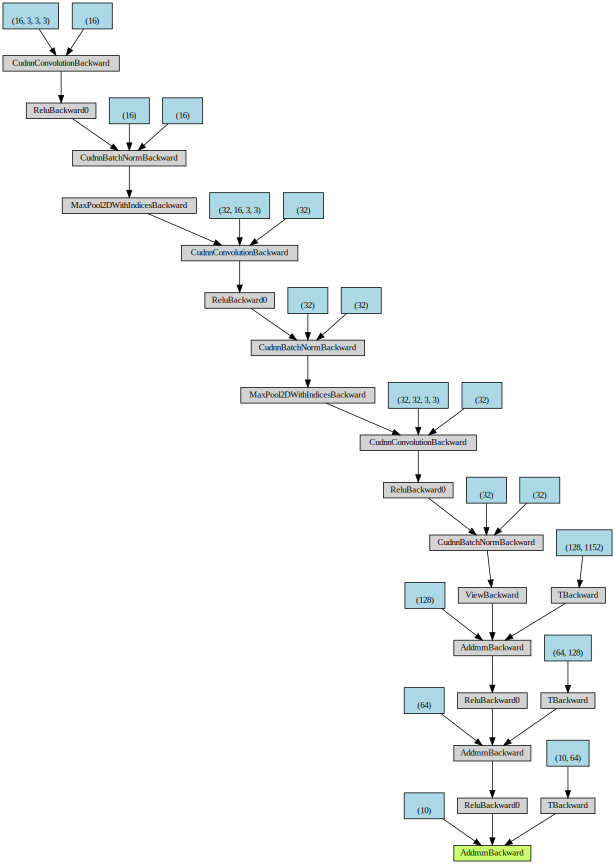

In [13]:
use_cuda = True
batch_size = 64
LR = 0.016
# LR = 0.001
# n_epochs = 6
n_epochs = 10

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

device = 'cpu' if not (use_cuda and torch.cuda.is_available()) else 'cuda'
print('Using', device)

net = NetCustom().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=LR, momentum=0.9, dampening=0, weight_decay=0.001, nesterov=True)
# optimizer = torch.optim.Adam(net.parameters(), lr=LR, weight_decay=0, amsgrad=False)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)
# scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer)

print('Model architecture:')
make_dot(net(torch.randn(64,3,32,32).to(device)))

In [14]:
trainset = torchvision.datasets.CIFAR10(root=path_data, train=True,
                                        download=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root=path_data, train=False,
                                       download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

current_time = "_".join([str(eval("datetime.datetime.now().time().{:0>2}".format(x))) for x in ["hour", "minute", "second"]])
print('Logging into logs/tensorboard/{}'.format(current_time))
path_log = 'logs/tensorboard/' + current_time

writer = SummaryWriter(path_log)
images, _ = next(iter(trainloader))
images = images.to(device)
writer.add_graph(net, images)

globaliter = 0
for epoch in range(1, n_epochs + 1):
    globaliter = train_epoch(trainloader, net, criterion, optimizer, scheduler, epoch,
                             device, 500, globaliter, writer)
    test_epoch(testloader, net, criterion, epoch, device, writer)

Logging into logs/tensorboard/12_34_42
Train Epoch: 1 [0/50000 (0%)]	Loss: 2.309026
Train Epoch: 1 [32000/50000 (64%)]	Loss: 1.278009
Test Accuracy: 53.25%
Train Epoch: 2 [0/50000 (0%)]	Loss: 1.241965
Train Epoch: 2 [32000/50000 (64%)]	Loss: 1.156199
Test Accuracy: 59.18%
Train Epoch: 3 [0/50000 (0%)]	Loss: 1.066522
Train Epoch: 3 [32000/50000 (64%)]	Loss: 1.015717
Test Accuracy: 61.97%
Train Epoch: 4 [0/50000 (0%)]	Loss: 1.138135
Train Epoch: 4 [32000/50000 (64%)]	Loss: 0.794296
Test Accuracy: 65.66%
Train Epoch: 5 [0/50000 (0%)]	Loss: 0.841340
Train Epoch: 5 [32000/50000 (64%)]	Loss: 0.693940
Test Accuracy: 73.47%
Train Epoch: 6 [0/50000 (0%)]	Loss: 1.001295
Train Epoch: 6 [32000/50000 (64%)]	Loss: 0.656267
Test Accuracy: 72.75%
Train Epoch: 7 [0/50000 (0%)]	Loss: 0.687489
Train Epoch: 7 [32000/50000 (64%)]	Loss: 0.809265
Test Accuracy: 73.52%
Train Epoch: 8 [0/50000 (0%)]	Loss: 0.836994
Train Epoch: 8 [32000/50000 (64%)]	Loss: 0.659426
Test Accuracy: 74.37%
Train Epoch: 9 [0/50000 (

In [17]:
for epoch in range(11, 15 + 1):
    globaliter = train_epoch(trainloader, net, criterion, optimizer, scheduler, epoch,
                             device, 500, globaliter, writer)
    test_epoch(testloader, net, criterion, epoch, device, writer)

Train Epoch: 11 [0/50000 (0%)]	Loss: 0.348783
Train Epoch: 11 [32000/50000 (64%)]	Loss: 0.824591
Test Accuracy: 76.68%
Train Epoch: 12 [0/50000 (0%)]	Loss: 0.669925
Train Epoch: 12 [32000/50000 (64%)]	Loss: 0.659020
Test Accuracy: 76.63%
Train Epoch: 13 [0/50000 (0%)]	Loss: 0.520948
Train Epoch: 13 [32000/50000 (64%)]	Loss: 0.553608
Test Accuracy: 76.55%
Train Epoch: 14 [0/50000 (0%)]	Loss: 0.402188


KeyboardInterrupt: 

In [ ]:
n_epochs = 13

In [19]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

test_accuracy = test_epoch(testloader, net, criterion, device=device)
test_per_class(testloader, net, classes, device=device)

log_in_json(net, criterion, batch_size, optimizer, scheduler, n_epochs, device, current_time, test_accuracy)

Test Accuracy: 76.88%
Accuracy of plane : 78 %
Accuracy of   car : 92 %
Accuracy of  bird : 68 %
Accuracy of   cat : 63 %
Accuracy of  deer : 67 %
Accuracy of   dog : 66 %
Accuracy of  frog : 80 %
Accuracy of horse : 75 %
Accuracy of  ship : 86 %
Accuracy of truck : 80 %


## Summary

In [21]:
get_summary_df()

,model,criterion,batch_size,optimizer,scheduler,n_epochs,device,test_accuracy
timestamp,,,,,,,,
12_34_42,"NetCustom( (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False) (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1)) (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1)) (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) (conv3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) (bn3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) (fc1): Linear(in_features=1152, out_features=128, bias=True) (fc2): Linear(in_features=128, out_features=64, bias=True) (fc3): Linear(in_features=64, out_features=10, bias=True) )",CrossEntropyLoss(),64,"SGD(lr: 0.016, momentum: 0.9, dampening: 0, weight_decay: 0.01, nesterov: True)","StepLR(gamma: 0.1, step_size: 5)",13,cuda,76.88%
11_28_35,"NetCustom( (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False) (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1)) (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1)) (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) (conv3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) (bn3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) (fc1): Linear(in_features=1152, out_features=128, bias=True) (fc2): Linear(in_features=128, out_features=64, bias=True) (fc3): Linear(in_features=64, out_features=10, bias=True) )",CrossEntropyLoss(),64,"SGD(lr: 0.016, momentum: 0.9, dampening: 0, weight_decay: 0, nesterov: True)","StepLR(gamma: 0.1, step_size: 5)",6,cuda,75.89%
18_36_27,"NetCustom( (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False) (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1)) (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1)) (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) (conv3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) (bn3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) (fc1): Linear(in_features=1152, out_features=128, bias=True) (fc2): Linear(in_features=128, out_features=64, bias=True) (fc3): Linear(in_features=64, out_features=10, bias=True) )",CrossEntropyLoss(),64,"SGD(lr: 0.016, momentum: 0.9, dampening: 0, weight_decay: 0, nesterov: False)","StepLR(gamma: 0.1, step_size: 5)",10,cuda,74.90%
18_40_11,"NetCustom( (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False) (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1)) (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1)) (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) (conv3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) (bn3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) (fc1): Linear(in_features=1152, out_features=128, bias=True) (fc2): Linear(in_features=128, out_features=64, bias=True) (fc3): Linear(in_features=64, out_features=10, bias=True) )",CrossEntropyLoss(),64,"Adam(lr: 0.001, betas: (0.9, 0.999), eps: 1e-08, weight_decay: 0, amsgrad: False)","StepLR(gamma: 0.1, step_size: 5)",10,cuda,74.73%
11_26_18,"NetCustom( (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False) (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1)) (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1)) (bn2): BatchNorm2d(32, eps=1e-05